## KneePoint

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

### Word KneePoint

In [2]:
df_word = pd.read_csv("/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/Turkish/Result/Turkish_Word_Result_Merge.csv")
df_word 

,word,frequency
0,bir,18835735
1,bu,11062659
2,ne,8025880
3,ve,7766036
4,için,5484109
...,...,...
168793,çığiığı,43
168794,boşandıklarını,42
168795,endişenlenme,42
168796,uzaylıymışım,42


In [5]:
word_frequency = df_word.iloc[:,1].sum()

In [6]:
df_word["ratio"] = round(((df_word.iloc[:,1]/word_frequency)*100),7)
df_word

,word,frequency,ratio
0,bir,18835735,2.720068
1,bu,11062659,1.597558
2,ne,8025880,1.159017
3,ve,7766036,1.121493
4,için,5484109,0.791960
...,...,...,...
168793,çığiığı,43,0.000006
168794,boşandıklarını,42,0.000006
168795,endişenlenme,42,0.000006
168796,uzaylıymışım,42,0.000006


In [7]:
df_word["cumul_ratio"] = np.cumsum(df_word["ratio"])
df_word

,word,frequency,ratio,cumul_ratio
0,bir,18835735,2.720068,2.720068
1,bu,11062659,1.597558,4.317626
2,ne,8025880,1.159017,5.476643
3,ve,7766036,1.121493,6.598136
4,için,5484109,0.791960,7.390096
...,...,...,...,...
168793,çığiığı,43,0.000006,95.599845
168794,boşandıklarını,42,0.000006,95.599852
168795,endişenlenme,42,0.000006,95.599858
168796,uzaylıymışım,42,0.000006,95.599864


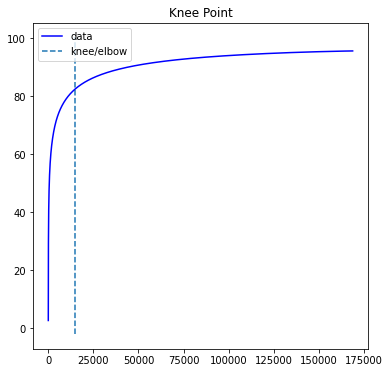

In [8]:
word_kneedle = KneeLocator(x=df_word.cumul_ratio.index, y=df_word.cumul_ratio, S=1.0, curve="concave", direction="increasing")
word_kneedle.plot_knee()

In [9]:
print(round(word_kneedle.knee_y))

82


In [10]:
knee_point_word = round(word_kneedle.knee_y)

In [12]:
df_word_knee = df_word[df_word.cumul_ratio <= knee_point_word]
df_word_knee

,word,frequency,ratio,cumul_ratio
0,bir,18835735,2.720068,2.720068
1,bu,11062659,1.597558,4.317626
2,ne,8025880,1.159017,5.476643
3,ve,7766036,1.121493,6.598136
4,için,5484109,0.791960,7.390096
...,...,...,...,...
14034,öyleler,3994,0.000577,81.997328
14035,sokan,3993,0.000577,81.997904
14036,bırakmadın,3993,0.000577,81.998481
14037,bağırıyor,3993,0.000577,81.999058


In [ ]:
word_num = len(df_word_knee.iloc[:,0])

In [13]:
df_word_knee.to_csv(f"Word_KneePoint_{knee_point_word}_And_{word_num}_Word.csv", index=False)

### Sentence KneePoint

In [14]:
df_sentence = pd.read_csv("/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/Turkish/Result/Turkish_Sentence_Result_Merge.csv")
df_sentence 

,sentence,frequency
0,evet,1843137
1,hayır,1175732
2,tamam,840328
3,ne,694335
4,teşekkürler,326757
...,...,...
137524,ben oh tanrım,8
137525,diyen sen değil miydin,8
137526,sen yanlışsın,7
137527,keske bilseydim,7


In [15]:
df_sentence["ratio"] = round(((df_sentence.iloc[:,1]/df_sentence.iloc[:,1].sum())*100),7)
df_sentence

,sentence,frequency,ratio
0,evet,1843137,3.643967
1,hayır,1175732,2.324476
2,tamam,840328,1.661367
3,ne,694335,1.372732
4,teşekkürler,326757,0.646014
...,...,...,...
137524,ben oh tanrım,8,0.000016
137525,diyen sen değil miydin,8,0.000016
137526,sen yanlışsın,7,0.000014
137527,keske bilseydim,7,0.000014


In [19]:
df_sentence["cumul_ratio"] = np.cumsum(df_sentence["ratio"])
df_sentence

,sentence,frequency,ratio,cumul_ratio
0,evet,1843137,3.643967,3.643967
1,hayır,1175732,2.324476,5.968443
2,tamam,840328,1.661367,7.629811
3,ne,694335,1.372732,9.002543
4,teşekkürler,326757,0.646014,9.648557
...,...,...,...,...
137524,ben oh tanrım,8,0.000016,99.999990
137525,diyen sen değil miydin,8,0.000016,100.000006
137526,sen yanlışsın,7,0.000014,100.000020
137527,keske bilseydim,7,0.000014,100.000034


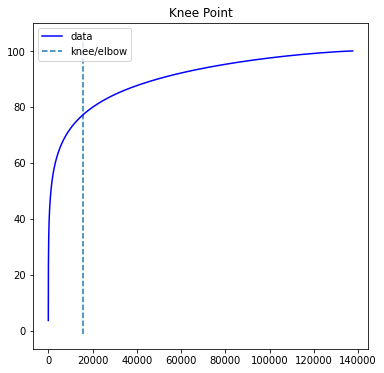

In [20]:
sent_kneedle = KneeLocator(x=df_sentence.cumul_ratio.index, y=df_sentence.cumul_ratio, S=1.0, curve="concave", direction="increasing")
sent_kneedle.plot_knee()

In [21]:
print(round(sent_kneedle.knee_y))

77


In [22]:
knee_point_sent = round(sent_kneedle.knee_y)

In [24]:
df_sent_knee = df_sentence[df_sentence.cumul_ratio <= knee_point_sent]
df_sent_knee

,sentence,frequency,ratio,cumul_ratio
0,evet,1843137,3.643967,3.643967
1,hayır,1175732,2.324476,5.968443
2,tamam,840328,1.661367,7.629811
3,ne,694335,1.372732,9.002543
4,teşekkürler,326757,0.646014,9.648557
...,...,...,...,...
15421,evet gerçekten öyle,360,0.000712,76.996803
15422,duymuş muydun,360,0.000712,76.997515
15423,izin verirseniz,360,0.000712,76.998226
15424,lütfen söyle bana,360,0.000712,76.998938


In [ ]:
sent_num = len(df_sent_knee.iloc[:,0])

In [25]:
df_sent_knee.to_csv(f"Sentence_KneePoint_{knee_point_sent}_And_{sent_num}_Sentence.csv", index=False)

### Two Grams KneePoint

In [26]:
df_twograms = pd.read_csv("/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/Turkish/Result/Turkish_TwoNgrams_Result_Merge.csv")
df_twograms

,twograms,frequency
0,bir şey,1896340
1,değil mi,1401845
2,ben de,821552
3,ne kadar,615787
4,ya da,598324
...,...,...
548690,bi yudum,40
548691,iyi hissettirdin,40
548692,olması bazen,38
548693,olsaydı yarın,37


In [27]:
df_twograms["ratio"] = round(((df_twograms.iloc[:,1]/df_twograms.iloc[:,1].sum())*100),7)
df_twograms

,twograms,frequency,ratio
0,bir şey,1896340,0.531091
1,değil mi,1401845,0.392602
2,ben de,821552,0.230085
3,ne kadar,615787,0.172458
4,ya da,598324,0.167567
...,...,...,...
548690,bi yudum,40,0.000011
548691,iyi hissettirdin,40,0.000011
548692,olması bazen,38,0.000011
548693,olsaydı yarın,37,0.000010


In [28]:
df_twograms["cumul_ratio"] = np.cumsum(df_twograms["ratio"])
df_twograms

,twograms,frequency,ratio,cumul_ratio
0,bir şey,1896340,0.531091,0.531091
1,değil mi,1401845,0.392602,0.923693
2,ben de,821552,0.230085,1.153777
3,ne kadar,615787,0.172458,1.326235
4,ya da,598324,0.167567,1.493802
...,...,...,...,...
548690,bi yudum,40,0.000011,99.999271
548691,iyi hissettirdin,40,0.000011,99.999282
548692,olması bazen,38,0.000011,99.999292
548693,olsaydı yarın,37,0.000010,99.999303


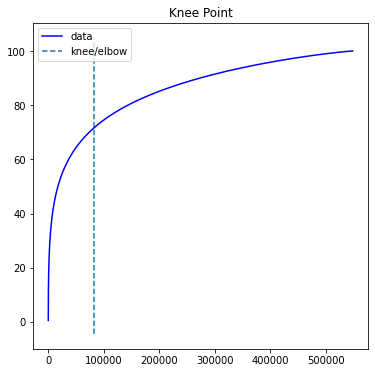

In [29]:
twogram_kneedle = KneeLocator(x=df_twograms.cumul_ratio.index, y=df_twograms.cumul_ratio, S=1.0, curve="concave", direction="increasing")
twogram_kneedle.plot_knee()

In [30]:
print(round(twogram_kneedle.knee_y))

71


In [31]:
knee_point_twogram = round(twogram_kneedle.knee_y)

In [32]:
df_twogram_knee = df_twograms[df_twograms.cumul_ratio <= knee_point_twogram]
df_twogram_knee

,twograms,frequency,ratio,cumul_ratio
0,bir şey,1896340,0.531091,0.531091
1,değil mi,1401845,0.392602,0.923693
2,ben de,821552,0.230085,1.153777
3,ne kadar,615787,0.172458,1.326235
4,ya da,598324,0.167567,1.493802
...,...,...,...,...
78988,olduklarını söyle,668,0.000187,70.999246
78989,demektir hayır,668,0.000187,70.999434
78990,kimleri görüyorum,668,0.000187,70.999621
78991,mi konuşuyor,668,0.000187,70.999808


In [ ]:
twogram_num = len(df_twogram_knee.iloc[:,0])

In [33]:
df_twogram_knee.to_csv(f"Two_Gram_KneePoint_{knee_point_twogram}_And_{twogram_num}_Twogram.csv", index=False)

### Three Grams KneePoint

In [34]:
df_threegrams = pd.read_csv("/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/Turkish/Result/Turkish_ThreeNgrams_Result_Merge.csv")
df_threegrams

,threegrams,frequency
0,bir şey var,138240
1,bir şey yok,137497
2,değil mi evet,134542
3,hayır hayır hayır,117126
4,başka bir şey,105338
...,...,...
266792,ama boş verin,40
266793,dostum önemli olan,39
266794,hissediyorum hayatım boyunca,39
266795,işte peki neden,39


In [35]:
df_threegrams["ratio"] = round(((df_threegrams.iloc[:,1]/df_threegrams.iloc[:,1].sum())*100),7)
df_threegrams

,threegrams,frequency,ratio
0,bir şey var,138240,0.145289
1,bir şey yok,137497,0.144508
2,değil mi evet,134542,0.141403
3,hayır hayır hayır,117126,0.123098
4,başka bir şey,105338,0.110709
...,...,...,...
266792,ama boş verin,40,0.000042
266793,dostum önemli olan,39,0.000041
266794,hissediyorum hayatım boyunca,39,0.000041
266795,işte peki neden,39,0.000041


In [36]:
df_threegrams["cumul_ratio"] = np.cumsum(df_threegrams["ratio"])
df_threegrams

,threegrams,frequency,ratio,cumul_ratio
0,bir şey var,138240,0.145289,0.145289
1,bir şey yok,137497,0.144508,0.289798
2,değil mi evet,134542,0.141403,0.431200
3,hayır hayır hayır,117126,0.123098,0.554299
4,başka bir şey,105338,0.110709,0.665008
...,...,...,...,...
266792,ama boş verin,40,0.000042,99.999900
266793,dostum önemli olan,39,0.000041,99.999941
266794,hissediyorum hayatım boyunca,39,0.000041,99.999982
266795,işte peki neden,39,0.000041,100.000023


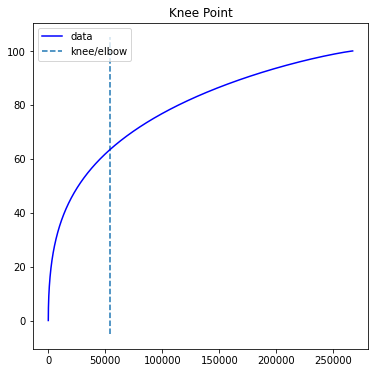

In [37]:
threegram_kneedle = KneeLocator(x=df_threegrams.cumul_ratio.index, y=df_threegrams.cumul_ratio, S=1.0, curve="concave", direction="increasing")
threegram_kneedle.plot_knee()

In [38]:
print(round(threegram_kneedle.knee_y))

64


In [39]:
knee_point_threegram = round(threegram_kneedle.knee_y)

In [40]:
df_threegram_knee = df_threegrams[df_threegrams.cumul_ratio <= knee_point_threegram]
df_threegram_knee

,threegrams,frequency,ratio,cumul_ratio
0,bir şey var,138240,0.145289,0.145289
1,bir şey yok,137497,0.144508,0.289798
2,değil mi evet,134542,0.141403,0.431200
3,hayır hayır hayır,117126,0.123098,0.554299
4,başka bir şey,105338,0.110709,0.665008
...,...,...,...,...
55525,ama bu yanlış,351,0.000369,63.998211
55526,dedim özür dilerim,351,0.000369,63.998580
55527,onun için yapabileceğimiz,351,0.000369,63.998949
55528,ama siz bunu,351,0.000369,63.999318


In [ ]:
threegram_num = len(df_threegram_knee.iloc[:,0])

In [41]:
df_threegram_knee.to_csv(f"Three_Gram_KneePoint_{knee_point_threegram}_And_{threegram_num}_Threegram.csv", index=False)

### Four Grams KneePoint

In [42]:
df_fourgrams = pd.read_csv("/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/Turkish/Result/Turkish_FourNgrams_Result_Merge.csv")
df_fourgrams

,fourgrams,frequency
0,bir şey var mı,49675
1,hayır hayır hayır hayır,34352
2,her şey yolunda mı,32424
3,burada ne işin var,23046
4,bir sorun mu var,22613
...,...,...
58123,asla sana zarar vermek,43
58124,sen de izin mi,43
58125,o da bir başka,43
58126,tamam al bakalım teşekkürler,42


In [43]:
df_fourgrams["ratio"] = round(((df_fourgrams.iloc[:,1]/df_fourgrams.iloc[:,1].sum())*100),7)
df_fourgrams

,fourgrams,frequency,ratio
0,bir şey var mı,49675,0.322767
1,hayır hayır hayır hayır,34352,0.223205
2,her şey yolunda mı,32424,0.210678
3,burada ne işin var,23046,0.149743
4,bir sorun mu var,22613,0.146930
...,...,...,...
58123,asla sana zarar vermek,43,0.000279
58124,sen de izin mi,43,0.000279
58125,o da bir başka,43,0.000279
58126,tamam al bakalım teşekkürler,42,0.000273


In [44]:
df_fourgrams["cumul_ratio"] = np.cumsum(df_fourgrams["ratio"])
df_fourgrams

,fourgrams,frequency,ratio,cumul_ratio
0,bir şey var mı,49675,0.322767,0.322767
1,hayır hayır hayır hayır,34352,0.223205,0.545972
2,her şey yolunda mı,32424,0.210678,0.756650
3,burada ne işin var,23046,0.149743,0.906393
4,bir sorun mu var,22613,0.146930,1.053323
...,...,...,...,...
58123,asla sana zarar vermek,43,0.000279,99.998885
58124,sen de izin mi,43,0.000279,99.999164
58125,o da bir başka,43,0.000279,99.999443
58126,tamam al bakalım teşekkürler,42,0.000273,99.999716


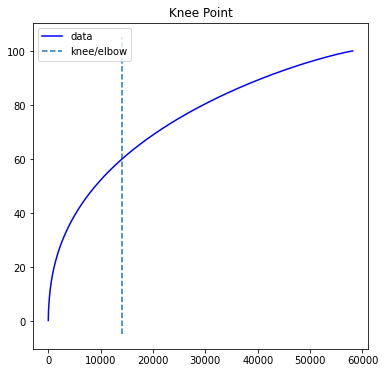

In [45]:
fourgram_kneedle = KneeLocator(x=df_fourgrams.cumul_ratio.index, y=df_fourgrams.cumul_ratio, S=1.0, curve="concave", direction="increasing")
fourgram_kneedle.plot_knee()

In [46]:
print(round(fourgram_kneedle.knee_y))

60


In [47]:
knee_point_fourgram = round(fourgram_kneedle.knee_y)

In [48]:
df_fourgram_knee = df_fourgrams[df_fourgrams.cumul_ratio <= knee_point_fourgram]
df_fourgram_knee

,fourgrams,frequency,ratio,cumul_ratio
0,bir şey var mı,49675,0.322767,0.322767
1,hayır hayır hayır hayır,34352,0.223205,0.545972
2,her şey yolunda mı,32424,0.210678,0.756650
3,burada ne işin var,23046,0.149743,0.906393
4,bir sorun mu var,22613,0.146930,1.053323
...,...,...,...,...
14049,seni daha önce de,263,0.001709,59.993053
14050,değil mi neden bahsettiğini,263,0.001709,59.994762
14051,için mutluyum ben de,263,0.001709,59.996471
14052,bir adamsın değil mi,263,0.001709,59.998180


In [ ]:
fourgram_num = len(df_fourgram_knee.iloc[:,0])

In [57]:
df_fourgram_knee.to_csv(f"Four_Gram_KneePoint_{knee_point_fourgram}_And_{fourgram_num}_Fourgram.csv", index=False)

### Five Grams KneePoint

In [50]:
df_fivegrams = pd.read_csv("/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/Turkish/Result/Turkish_FiveNgrams_Result_Merge.csv")
df_fivegrams

,fivegrams,frequency
0,hayır hayır hayır hayır hayır,14131
1,başka bir şey var mı,10962
2,seni seviyorum ben de seni,9309
3,her şey yolunda mı evet,8599
4,seviyorum ben de seni seviyorum,7340
...,...,...
8923,bunu kimin yaptığını bilmek istiyorum,45
8924,çok uzun bir süre boyunca,45
8925,sonunda seninle tanıştığıma memnun oldum,43
8926,sorun değil olur böyle şeyler,42


In [51]:
df_fivegrams["ratio"] = round(((df_fivegrams.iloc[:,1]/df_fivegrams.iloc[:,1].sum())*100),7)
df_fivegrams

,fivegrams,frequency,ratio
0,hayır hayır hayır hayır hayır,14131,0.675985
1,başka bir şey var mı,10962,0.524389
2,seni seviyorum ben de seni,9309,0.445315
3,her şey yolunda mı evet,8599,0.411350
4,seviyorum ben de seni seviyorum,7340,0.351124
...,...,...,...
8923,bunu kimin yaptığını bilmek istiyorum,45,0.002153
8924,çok uzun bir süre boyunca,45,0.002153
8925,sonunda seninle tanıştığıma memnun oldum,43,0.002057
8926,sorun değil olur böyle şeyler,42,0.002009


In [52]:
df_fivegrams["cumul_ratio"] = np.cumsum(df_fivegrams["ratio"])
df_fivegrams

,fivegrams,frequency,ratio,cumul_ratio
0,hayır hayır hayır hayır hayır,14131,0.675985,0.675985
1,başka bir şey var mı,10962,0.524389,1.200374
2,seni seviyorum ben de seni,9309,0.445315,1.645689
3,her şey yolunda mı evet,8599,0.411350,2.057039
4,seviyorum ben de seni seviyorum,7340,0.351124,2.408163
...,...,...,...,...
8923,bunu kimin yaptığını bilmek istiyorum,45,0.002153,99.991773
8924,çok uzun bir süre boyunca,45,0.002153,99.993925
8925,sonunda seninle tanıştığıma memnun oldum,43,0.002057,99.995982
8926,sorun değil olur böyle şeyler,42,0.002009,99.997991


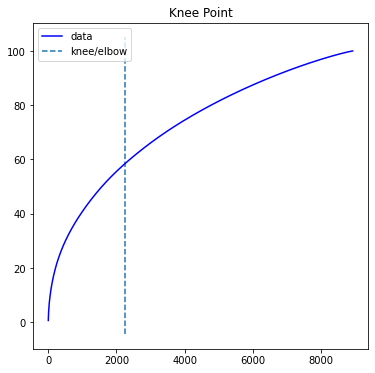

In [53]:
fivegram_kneedle = KneeLocator(x=df_fivegrams.cumul_ratio.index, y=df_fivegrams.cumul_ratio, S=1.0, curve="concave", direction="increasing")
fivegram_kneedle.plot_knee()

In [54]:
print(round(fivegram_kneedle.knee_y))

58


In [55]:
knee_point_fivegram = round(fivegram_kneedle.knee_y)

In [56]:
df_fivegram_knee = df_fivegrams[df_fivegrams.cumul_ratio <= knee_point_fivegram]
df_fivegram_knee

,fivegrams,frequency,ratio,cumul_ratio
0,hayır hayır hayır hayır hayır,14131,0.675985,0.675985
1,başka bir şey var mı,10962,0.524389,1.200374
2,seni seviyorum ben de seni,9309,0.445315,1.645689
3,her şey yolunda mı evet,8599,0.411350,2.057039
4,seviyorum ben de seni seviyorum,7340,0.351124,2.408163
...,...,...,...,...
2202,ne dedin sen ne dedin,236,0.011289,57.952947
2203,seni rahatsız ediyor mu hayır,236,0.011289,57.964237
2204,uzun sürdüğü için özür dilerim,236,0.011289,57.975526
2205,anne burada ne işin var,236,0.011289,57.986816


In [ ]:
fivegram_num = len(df_fivegram_knee.iloc[:,0])

In [58]:
df_fivegram_knee.to_csv(f"Five_Gram_KneePoint_{knee_point_fivegram}_And_{fivegram_num}_Fivegram.csv", index=False)

### Six Grams KneePoint

In [59]:
df_sixgrams = pd.read_csv("/media/kurubal/SSD1/Data Scientist/Work/Modern Ways/Project/Turkish/Result/Turkish_SixNgrams_Result_Merge.csv")
df_sixgrams

,sixgrams,frequency
0,hayır hayır hayır hayır hayır hayır,7088
1,seni seviyorum ben de seni seviyorum,6503
2,sana söylemem gereken bir şey var,4098
3,bir iki üç dört beş altı,2650
4,üç dört beş altı yedi sekiz,2130
...,...,...
1522,herhangi bir şeye ihtiyacın var mı,50
1523,yaptığına dair bir fikriniz var mı,48
1524,duyuyor musun beni duyuyor musun beni,48
1525,kimin yaptığına dair bir fikriniz var,45


In [60]:
df_sixgrams["ratio"] = round(((df_sixgrams.iloc[:,1]/df_sixgrams.iloc[:,1].sum())*100),7)
df_sixgrams

,sixgrams,frequency,ratio
0,hayır hayır hayır hayır hayır hayır,7088,1.942157
1,seni seviyorum ben de seni seviyorum,6503,1.781864
2,sana söylemem gereken bir şey var,4098,1.122878
3,bir iki üç dört beş altı,2650,0.726117
4,üç dört beş altı yedi sekiz,2130,0.583634
...,...,...,...
1522,herhangi bir şeye ihtiyacın var mı,50,0.013700
1523,yaptığına dair bir fikriniz var mı,48,0.013152
1524,duyuyor musun beni duyuyor musun beni,48,0.013152
1525,kimin yaptığına dair bir fikriniz var,45,0.012330


In [61]:
df_sixgrams["cumul_ratio"] = np.cumsum(df_sixgrams["ratio"])
df_sixgrams

,sixgrams,frequency,ratio,cumul_ratio
0,hayır hayır hayır hayır hayır hayır,7088,1.942157,1.942157
1,seni seviyorum ben de seni seviyorum,6503,1.781864,3.724021
2,sana söylemem gereken bir şey var,4098,1.122878,4.846899
3,bir iki üç dört beş altı,2650,0.726117,5.573016
4,üç dört beş altı yedi sekiz,2130,0.583634,6.156649
...,...,...,...,...
1522,herhangi bir şeye ihtiyacın var mı,50,0.013700,99.950132
1523,yaptığına dair bir fikriniz var mı,48,0.013152,99.963284
1524,duyuyor musun beni duyuyor musun beni,48,0.013152,99.976436
1525,kimin yaptığına dair bir fikriniz var,45,0.012330,99.988766


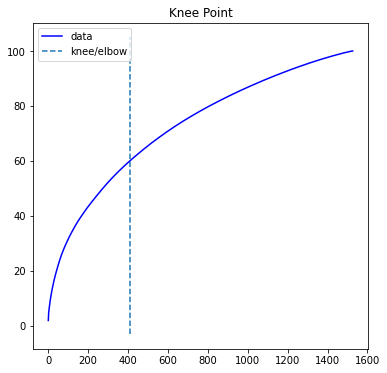

In [62]:
sixgram_kneedle = KneeLocator(x=df_sixgrams.cumul_ratio.index, y=df_sixgrams.cumul_ratio, S=1.0, curve="concave", direction="increasing")
sixgram_kneedle.plot_knee()

In [63]:
print(round(sixgram_kneedle.knee_y))

60


In [64]:
knee_point_sixgram = round(sixgram_kneedle.knee_y)

In [65]:
df_sixgram_knee = df_sixgrams[df_sixgrams.cumul_ratio <= knee_point_sixgram]
df_sixgram_knee

,sixgrams,frequency,ratio,cumul_ratio
0,hayır hayır hayır hayır hayır hayır,7088,1.942157,1.942157
1,seni seviyorum ben de seni seviyorum,6503,1.781864,3.724021
2,sana söylemem gereken bir şey var,4098,1.122878,4.846899
3,bir iki üç dört beş altı,2650,0.726117,5.573016
4,üç dört beş altı yedi sekiz,2130,0.583634,6.156649
...,...,...,...,...
404,hakkında bir fikriniz var mı hayır,238,0.065213,59.685166
405,olabileceği hakkında bir fikrin var mı,237,0.064939,59.750106
406,ben de ben de ben de,237,0.064939,59.815045
407,dair en ufak bir fikrim yok,235,0.064392,59.879437


In [ ]:
sixgram_num = len(df_sixgram_knee.iloc[:,0])

In [66]:
df_sixgram_knee.to_csv(f"Six_Gram_KneePoint_{knee_point_sixgram}_And_{sixgram_num}_Sixgram.csv", index=False)